<a href="https://colab.research.google.com/github/yukomath/Project_1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Data preparation


In [ ]:
import pandas as pd

# path to the data in my google drive
path = '/content/drive/MyDrive/ColabProjects/StackOverflow2025/survey_results_public_2025.csv'

# loading data
df = pd.read_csv(path)

# check Data
print("データの形状:", df.shape)
df.head()


データの形状: (49123, 170)


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [ ]:
# import library
import pandas as pd
import numpy as np

# loading csv file from my google drive
path = '/content/drive/MyDrive/ColabProjects/StackOverflow2025/survey_results_public_2025.csv'
df = pd.read_csv(path, encoding='utf-8-sig')

print("Data loaded successfully")
print("Rows, Columns:", df.shape)
print("First few column names:", df.columns[:10].tolist())



Data loaded successfully
Rows, Columns: (49123, 170)
First few column names: ['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode', 'LearnCodeAI']


In [ ]:
# check what columns in the data
print(df.columns.tolist())



['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode', 'LearnCodeAI', 'AILearnHow', 'YearsCode', 'DevType', 'OrgSize', 'ICorPM', 'RemoteWork', 'PurchaseInfluence', 'TechEndorseIntro', 'TechEndorse_1', 'TechEndorse_2', 'TechEndorse_3', 'TechEndorse_4', 'TechEndorse_5', 'TechEndorse_6', 'TechEndorse_7', 'TechEndorse_8', 'TechEndorse_9', 'TechEndorse_13', 'TechEndorse_13_TEXT', 'TechOppose_1', 'TechOppose_2', 'TechOppose_3', 'TechOppose_5', 'TechOppose_7', 'TechOppose_9', 'TechOppose_11', 'TechOppose_13', 'TechOppose_16', 'TechOppose_15', 'TechOppose_15_TEXT', 'Industry', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSatPoints_13', 'JobSatPoints_14', 'JobSatPoints_15', 'JobSatPoints_16', 'JobSatPoints_15_TEXT', 'AIThreat', 'NewRole', 'ToolCountWork', 'ToolCountPersonal', 'Country', 'Currency', 'CompTota

In [ ]:
# Select relevant columns in the data

cols = [
    "Country",
    "Age",
    "EdLevel",
    "YearsCode",              # coding experience years
    "Employment",
    "LanguageHaveWorkedWith", # languages used
    "AISelect",               # AI tools usage indicator
    "ConvertedCompYearly"     # salary (target)
]
df = df[cols].copy()

In [ ]:
# handle missing values
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors='coerce')
df = df[df["ConvertedCompYearly"].notnull()]  # drop rows without salary

# we put medium dor missing YearsCode
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce')
df["YearsCode"].fillna(df["YearsCode"].median(), inplace=True)


df["EdLevel"].fillna("Unknown", inplace=True)
df["Country"].fillna("Unknown", inplace=True)
df["Employment"].fillna("Other", inplace=True)
df["AISelect"].fillna("No Answer", inplace=True)


/tmp/ipython-input-828765134.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCode"].fillna(df["YearsCode"].median(), inplace=True)
/tmp/ipython-input-828765134.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
# Remove salary outliers
df = df[df["ConvertedCompYearly"].between(5000, 500000)]


In [ ]:
# One-hot encode the multi-valued language column
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].fillna("")
languages = df["LanguageHaveWorkedWith"].str.get_dummies(sep=';')


In [ ]:
# One-hot encode categorical columns
cat_cols = ["Country", "EdLevel", "Employment", "AISelect"]
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)


In [ ]:
# Combine all features
X = pd.concat([
    df[["YearsCode"]],
    languages,
    df_encoded
], axis=1)

y = df["ConvertedCompYearly"]

print("Feature engineering completed successfully")
print("Number of features:", X.shape[1])
print("Number of target samples:", y.shape[0])

Feature engineering completed successfully
Number of features: 216
Number of target samples: 22046


In [ ]:
# Preview results
print("\n--- Feature sample ---")
display(X.head())

print("\n--- Target (Salary) statistics ---")
display(y.describe())



--- Feature sample ---


,YearsCode,Ada,Assembly,Bash/Shell (all shells),C,C#,C++,COBOL,Dart,Delphi,...,Employment_I prefer not to say,"Employment_Independent contractor, freelancer, or self-employed",Employment_Not employed,Employment_Retired,Employment_Student,"AISelect_No, and I don't plan to","AISelect_No, but I plan to soon","AISelect_Yes, I use AI tools daily","AISelect_Yes, I use AI tools monthly or infrequently","AISelect_Yes, I use AI tools weekly"
0,14.0,0,0,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
1,10.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,12.0,0,0,0,0,0,0,0,1,0,...,False,True,False,False,False,False,False,True,False,False
3,5.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,22.0,0,0,0,1,1,1,0,0,1,...,False,True,False,False,False,False,False,False,False,True



--- Target (Salary) statistics ---


,ConvertedCompYearly
count,22046.000000
mean,95028.562324
std,70556.452480
min,5000.000000
25%,46406.000000
50%,80323.000000
75%,125000.000000
max,500000.000000


Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Train samples: 17636
Test samples: 4410


2. Build a Salary Prediction Model with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# 線形回帰モデル
lr = LinearRegression()
lr.fit(X_train, y_train)

# 予測
y_pred_lr = lr.predict(X_test)

# 評価
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("モデルが給料の約", r2_score(y_test, y_pred_lr), "% を説明できているという意味")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("平均的に、予測給料が実際と±",mean_absolute_error(y_test, y_pred_lr), "ドルずれている")

# 最後の評価のために名前をつけておく
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)


# 回帰係数（特徴量の影響度）
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n--- Top Positive Coefficients ---")
display(coef_df.head(10))

print("\n--- Top Negative Coefficients ---")
display(coef_df.tail(10))


Linear Regression R²: 0.44995155962013267
モデルが給料の約 0.44995155962013267 % を説明できているという意味
MAE: 34177.26644417824
平均的に、予測給料が実際と± 34177.26644417824 ドルずれている

--- Top Positive Coefficients ---


,Feature,Coefficient
144,Country_Oman,364128.880159
142,Country_North Korea,177365.918199
57,Country_Belize,118318.988086
190,Country_United States of America,117032.987835
45,Country_Andorra,105996.839558
176,Country_Switzerland,103288.715899
141,Country_Nomadic,102388.003409
126,Country_Mauritania,92892.370800
105,Country_Israel,91985.996562
98,Country_Iceland,80791.916798



--- Top Negative Coefficients ---


,Feature,Coefficient
120,Country_Madagascar,-19137.781553
123,Country_Maldives,-19796.755005
65,Country_Cameroon,-23297.623789
58,Country_Benin,-25572.471284
59,Country_Bhutan,-31656.213710
162,Country_Senegal,-34955.829173
124,Country_Mali,-39664.392314
196,Country_Zambia,-41886.474512
209,Employment_Retired,-46777.981157
210,Employment_Student,-51614.313766


3. Build a Salary Prediction Model with Random Forest


In [ ]:
!pip install shap


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import shap


In [ ]:
# ランダムフォレストモデルの作成 #パラメータを調節したバージョン
rf = RandomForestRegressor(
    n_estimators=500,   #決定木の本数
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1        # 並列処理で高速化
)

# 学習
rf.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [ ]:
# テストデータで予測
y_pred_rf = rf.predict(X_test)

# 評価指標
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"MAE: {mae_rf:,.0f} USD")



Random Forest R²: 0.457
MAE: 34,064 USD


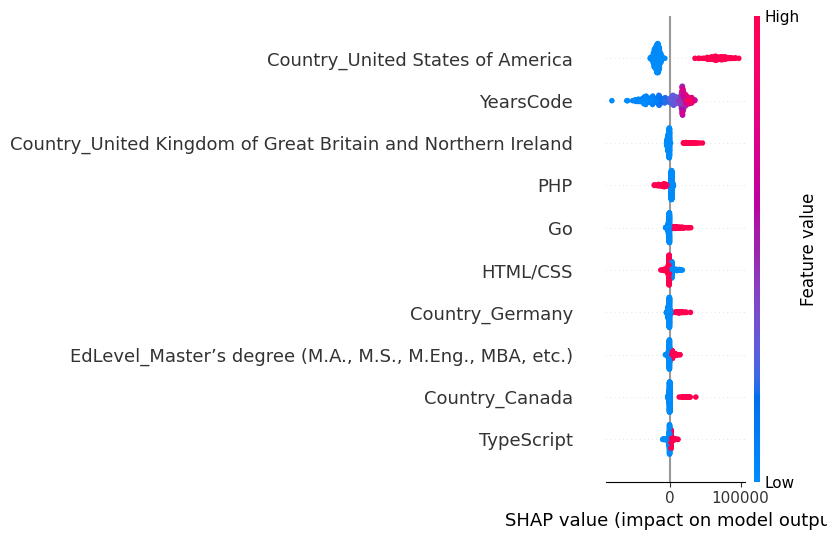

In [ ]:
# SHAP解析の準備
explainer_rf = shap.TreeExplainer(rf)

# テストデータのSHAP値を計算（少し時間がかかります）
#shap_values_rf = explainer_rf.shap_values(X_test)

# サマリープロット（上位特徴量）
#shap.summary_plot(shap_values_rf, X_test)

#version 2
#テストデータのshap値の計算（処理が重いのでサンプルを減らす）
#shap_values_rf = explainer_rf.shap_values(X_test.sample(1000, random_state=42))
#shap.summary_plot(shap_values_rf, X_test.sample(1000, random_state=42))

#version 3 上位10特徴量だけ表示
X_sample = X_test.sample(500, random_state=42)
shap_values_rf = explainer_rf.shap_values(X_sample)
shap.summary_plot(shap_values_rf, X_sample, max_display=10)

In [ ]:
import pandas as pd

feat_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n--- Top 15 Important Features (Random Forest) ---")
display(feat_importance.head(15))



--- Top 15 Important Features (Random Forest) ---


,Feature,Importance
190,Country_United States of America,0.355920
0,YearsCode,0.217602
176,Country_Switzerland,0.024707
16,Go,0.017634
188,Country_United Kingdom of Great Britain and No...,0.016343
18,HTML/CSS,0.015961
213,"AISelect_Yes, I use AI tools daily",0.014618
28,PHP,0.014573
210,Employment_Student,0.013865
207,"Employment_Independent contractor, freelancer,...",0.013269


SHAPプロットの読み方

横軸（SHAP値）：特徴量が給与に与える影響

プラス → 給与を上げる方向

マイナス → 給与を下げる方向

縦軸（特徴量）：重要度順に並ぶ

色：特徴量の値

赤＝値が高い

青＝値が低い

3. Build a Salary Prediction Model with LightGBM

In [ ]:
# Install dependencies (only once)
!pip install lightgbm shap -q
!pip install lightgbm -q



In [ ]:
import lightgbm as lgb
import shap
from sklearn.metrics import r2_score, mean_absolute_error


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 17636, number of used features: 124
[LightGBM] [Info] Start training from score 95267.523985
✅ LightGBM model trained successfully!
LightGBM R²: 0.482
MAE: 32,670 USD


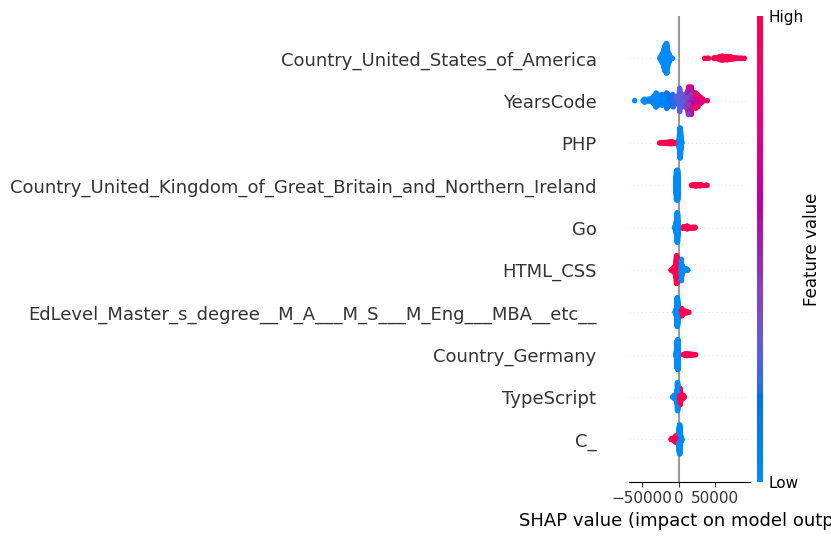

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32102 (\N{CJK UNIFIED IDEOGRAPH-7D66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  fig.canvas

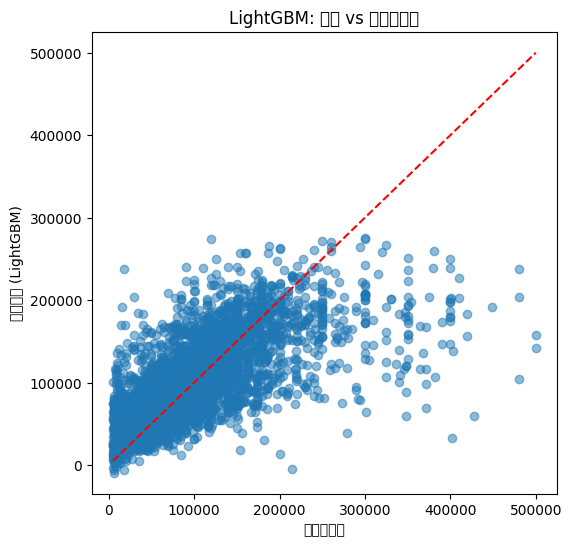

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import shap
import matplotlib.pyplot as plt

# ------------------------------
# 0️⃣ データは X, y で準備済み
# ------------------------------
# X : 特徴量データフレーム
# y : ConvertedCompYearly

# ------------------------------
# 1️⃣ 特徴量名を安全な文字に変換
# ------------------------------
X.columns = X.columns.str.replace(r'[^0-9a-zA-Z_]', '_', regex=True)

# ------------------------------
# 2️⃣ データ分割
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 3️⃣ LightGBMモデル作成
# ------------------------------
lgbm = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 学習
lgbm.fit(X_train, y_train)
print("✅ LightGBM model trained successfully!")

# ------------------------------
# 4️⃣ モデル評価
# ------------------------------
y_pred_lgb = lgbm.predict(X_test)
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

print(f"LightGBM R²: {r2_lgb:.3f}")
print(f"MAE: {mae_lgb:,.0f} USD")

# ------------------------------
# 5️⃣ SHAP解析（軽量版）
# ------------------------------
# テストデータからサンプル500件に絞る
X_sample_lgb = X_test.sample(500, random_state=42)

explainer_lgb = shap.TreeExplainer(lgbm)
shap_values_lgb = explainer_lgb.shap_values(X_sample_lgb)

# 上位10特徴量のみ表示
shap.summary_plot(shap_values_lgb, X_sample_lgb, max_display=10)

# ------------------------------
# 6️⃣ 予測 vs 実際の給料散布図
# ------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("実際の給料")
plt.ylabel("予測給料 (LightGBM)")
plt.title("LightGBM: 予測 vs 実際の給料")
plt.show()



赤＝値が高い、青＝値が低い

プラス＝給与を上げる方向、マイナス＝下げる方向

上位10特徴量で最も影響の大きい要素を簡単に確認可能



結果の可視化

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error


# 結果確認
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "LightGBM"],
    "R2": [r2_lr, r2_rf, r2_lgb],
    "MAE": [mae_lr, mae_rf, mae_lgb]
})
print(results)


               Model        R2           MAE
0  Linear Regression  0.449952  34177.266444
1      Random Forest  0.457286  34063.818348
2           LightGBM  0.481915  32670.456382


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

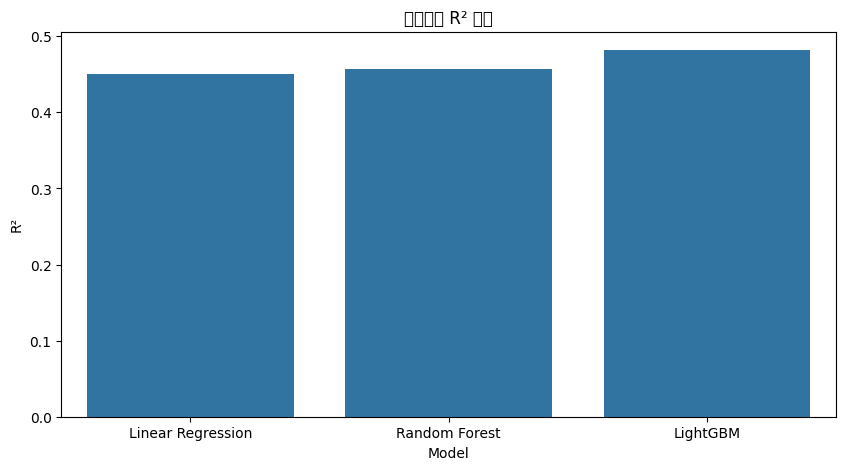

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

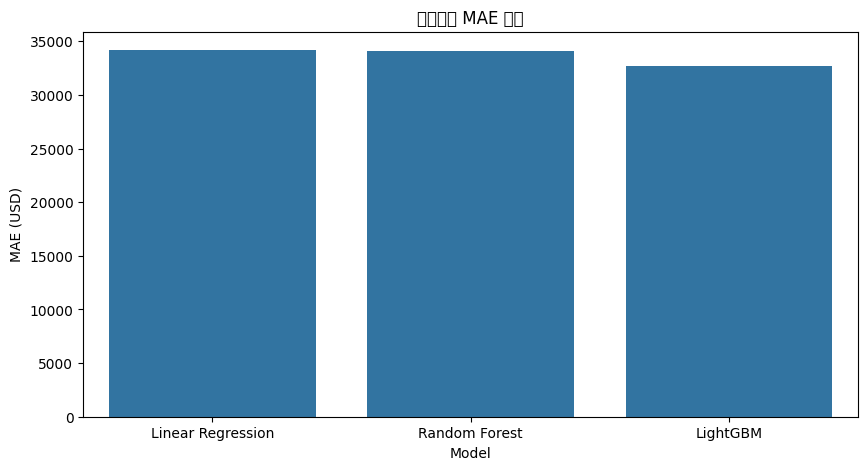

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2", data=results)
plt.title("モデル別 R² 比較")
plt.ylabel("R²")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="MAE", data=results)
plt.title("モデル別 MAE 比較")
plt.ylabel("MAE (USD)")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32102 (\N{CJK UNIFIED IDEOGRAPH-7D66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas

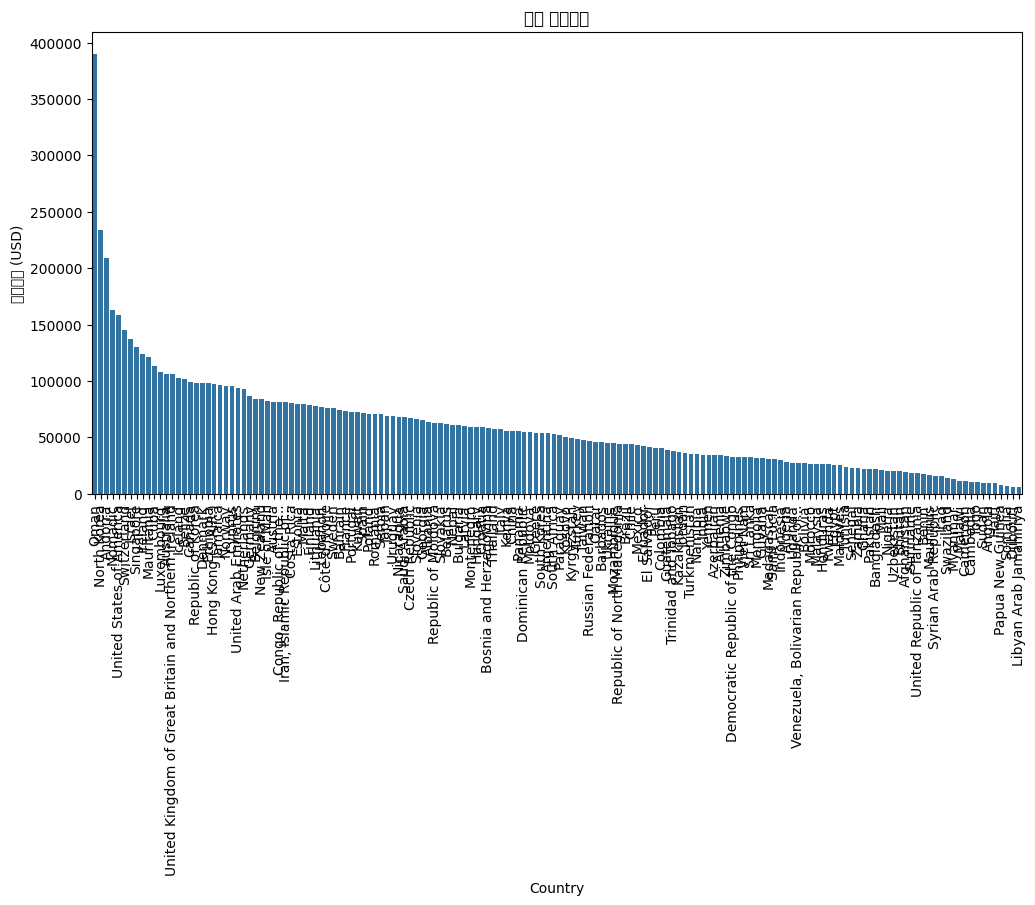

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32102 (\N{CJK UNIFIED IDEOGRAPH-7D66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

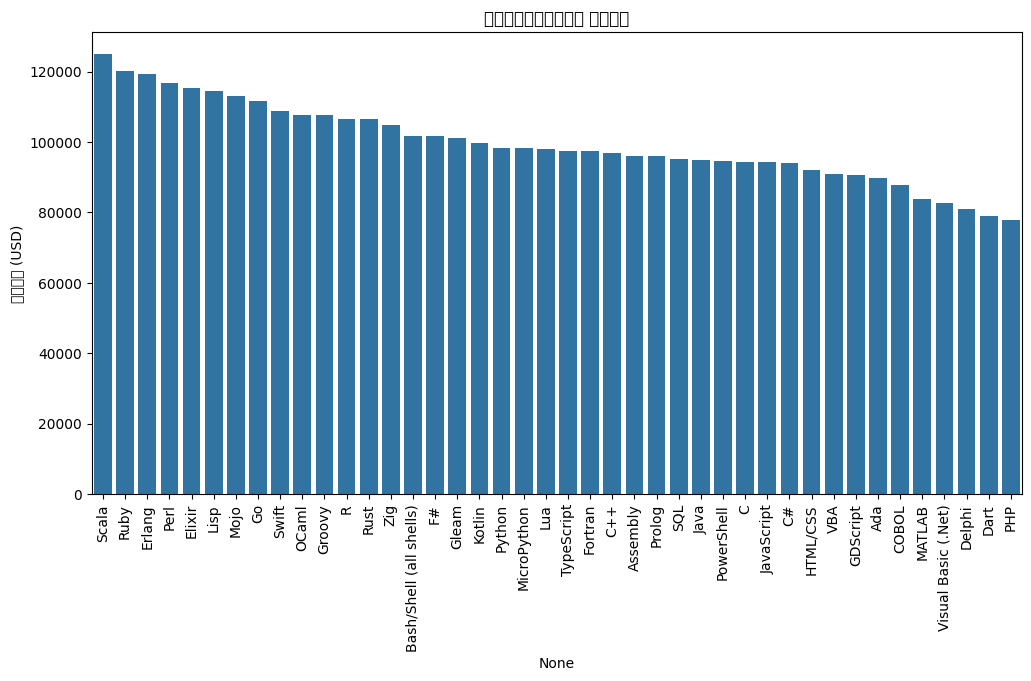

In [ ]:
import re

# 国別平均給料
country_salary = df.groupby("Country")["ConvertedCompYearly"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=country_salary.index, y=country_salary.values)
plt.xticks(rotation=90)
plt.ylabel("平均給料 (USD)")
plt.title("国別 平均給料")
plt.show()

# 言語別平均給料
# Create a list of all languages mentioned in the survey
all_languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
unique_languages = all_languages.unique()

# Calculate average salary for each language
language_salary = {}
for lang in unique_languages:
    if pd.notnull(lang) and lang != '': # Handle potential empty strings or NaN
        # Escape special characters in language names for accurate matching
        escaped_lang = re.escape(lang)
        # Find indices where the language is present in the original column
        indices = df['LanguageHaveWorkedWith'].str.contains(escaped_lang, na=False)
        # Calculate the mean salary for these entries
        language_salary[lang] = df.loc[indices, "ConvertedCompYearly"].mean()

language_salary = pd.Series(language_salary).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=language_salary.index, y=language_salary.values)
plt.xticks(rotation=90)
plt.ylabel("平均給料 (USD)")
plt.title("プログラミング言語別 平均給料")
plt.show()